# Defining the Problem

As it happends with sagas, trillogies. Sometimes is difficult to follow up 
dense plots so i want to integrate the characters from Harry Potter with the context of data analysis ,making a character network analysis ***using Gephi*** to figure out the central characters, and how their interactions have been between each other

#### importing modules & reproducibility

In [20]:
# import modules
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Fixing random state for reproducibility
np.random.seed(387)

# ***Preprocessing***

In [22]:
# read data
characters = pd.read_csv('datasets/Characters.csv', sep=';')
hp1 = pd.read_csv('datasets/Harry Potter 1.csv', sep=';')
hp2 = pd.read_csv('datasets/Harry Potter 2.csv', sep=';')
hp3 = pd.read_csv('datasets/Harry Potter 3.csv', sep=';')

## ***profiling structure***
### fixing books data

In [23]:
trilogy = [hp1, hp2, hp3] 

# changing books columns and values to lower case
'''if not other cols would be created because of name differences'''
for book in trilogy:
    book.columns = hp1.columns.str.lower()
    book['character'] = book['character'].str.lower() # character column
    book['sentence'] = book['sentence'].str.lower()   # sentence column

In [88]:
# vertical concatenation of books
combined = pd.concat([hp1, hp2, hp3], ignore_index=True)
combined.head()
# save combined for network graph
combined.to_csv('combined.csv')

### fixing characters data

In [25]:
# changing characters columns to lower case
'''if not other cols would be created because of name differences'''
characters.columns = characters.columns.str.lower()

In [26]:
# columns to date format
characters['birth'] = pd.to_datetime(characters['birth'], errors='coerce')
characters['death'] = pd.to_datetime(characters['death'], errors='coerce')

In [27]:
# get non numerical values
non_num = characters.select_dtypes(exclude=['int64','float64','datetime','timedelta'])
num     = characters.select_dtypes(exclude=['object'])

non_num.columns

Index(['name', 'gender', 'job', 'house', 'wand', 'patronus', 'species',
       'blood status', 'hair colour', 'eye colour', 'loyalty', 'skills'],
      dtype='object')

In [28]:
# changing character non_num values to lowercase
for column in non_num.columns:
    non_num[column] = non_num[column].str.lower() #lowercase

characters[non_num.columns] = non_num # replace in original table
characters.head(2) # inspect

,id,name,gender,job,house,wand,patronus,species,blood status,hair colour,eye colour,loyalty,skills,birth,death
0,1,harry james potter,male,student,gryffindor,"11"" holly phoenix feather",stag,human,half-blood,black,bright green,albus dumbledore | dumbledore's army | order o...,parseltongue| defence against the dark arts | ...,1980-07-31,NaT
1,2,ronald bilius weasley,male,student,gryffindor,"12"" ash unicorn tail hair",jack russell terrier,human,pure-blood,red,blue,dumbledore's army | order of the phoenix | hog...,wizard chess | quidditch goalkeeping,1980-03-01,NaT


# Plots :
### Characters with the most sentences
#### top 15 of the first 3 movies 

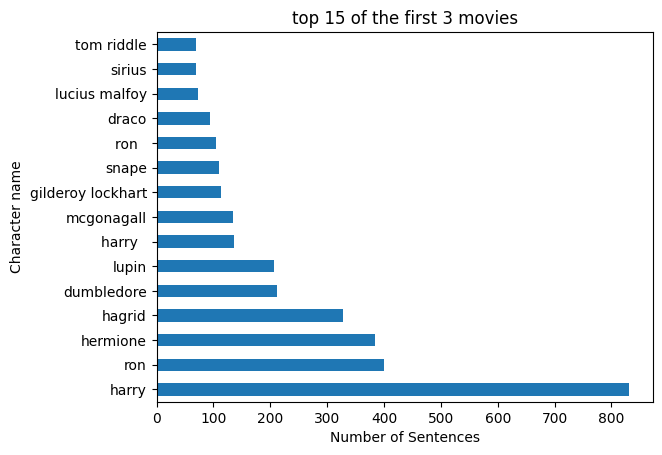

In [29]:
%matplotlib inline
df = combined
df = df.groupby('character').count()
df = df.sort_values(by='sentence',ascending=False)
df = df.head(15)
df['sentence'].plot(kind='barh')
plt.title('top 15 of the first 3 movies')
plt.xlabel('Number of Sentences')
plt.ylabel('Character name')
plt.show()


### Most popular words
#### Text Mining and Sentiment Analysis with NLTK and pandas in Python, frequency distribution

In [35]:
'''tokenize words in columns and exclude stopwords'''

df = combined #dataframe of 3 movies

# match Unicode word characters with one or more occurrences
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('punkt')
    
regexp = RegexpTokenizer('\w+')

# apply tokenize to split words in a list
df['text_token']=df['sentence'].apply(regexp.tokenize)

# words in a stop list which are dropped before analysing
nltk.download('stopwords')


# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")
my_stopwords = ['well','one','know','got','sir','going','would','see','like','back','think','right','good','bad','i','ve','are','you','should','be','am','the','let','and','it','is','so','to','no','me','do','yes','was','were','in','get','did','of','about','talking','there','s','any']
stopwords.extend(my_stopwords)

# use a lambda function to remove the stopwords:
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df['text_token'] = df['text_token'].dropna()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
"""Remove infrequent words and convert to string, frquency distribution"""

# keep only words which are longer than 2 letters
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

# Create a list of all words in str
all_words = ' '.join([word for word in df['text_string']])

# Tokenize all_words (separate)
tokenized_words = nltk.tokenize.word_tokenize(all_words)
tokenized_words[:3]

# Create a frequency distribution 
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'harry': 285, 'come': 163, 'potter': 115, 'hagrid': 90, 'professor': 89, 'ron': 82, 'time': 62, 'dobby': 60, 'dumbledore': 59, 'never': 57, ...})

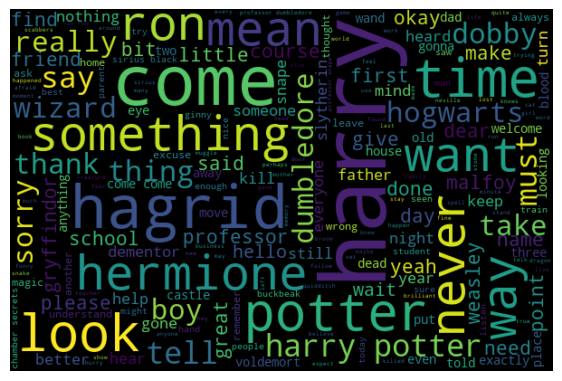

In [84]:
# Wordcloud with frequency distribution

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

seed = 666

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(7, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

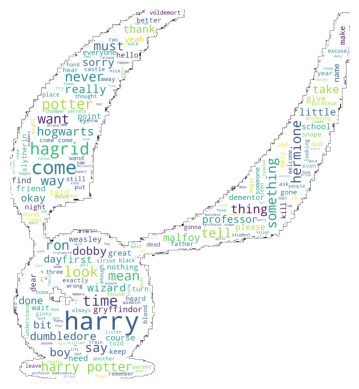

In [87]:
# Different style:

# importing modules
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt 
import PIL.Image
    
mask = np.array(PIL.Image.open("ball.png"))

wc = WordCloud(stopwords = STOPWORDS,
               mask = mask,
               background_color = "white",
               contour_color = "black",
               contour_width = 0.9,
               min_font_size= 10).generate(all_words)

plt.imshow(wc)
plt.axis("off")
plt.show()

# store to file
wc.to_file("ball_wc.jpg")

# network graph

In [138]:
# split loyalty column
'''im  gonna give split them by loyal_to (harry/or not) and weight that dependes on how many times they appeared.
also trying to get the connections between them (don't know how yet)'''


#loyal_to = characters[['name','loyalty']]
#loyal_to

import sqlite3
con = sqlite3.connect('characters') 
query = pd.read_sql('SELECT name, loyalty FROM characters WHERE loyalty = NULL ORDER BY loyalty;',con)
listed = characters[['name','loyalty']] 
listed

DatabaseError: Execution failed on sql 'SELECT name, loyalty FROM characters WHERE loyalty = NULL ORDER BY loyalty;': no such table: characters